In [ ]:
# Import the prepared breast cancer dataset

import pandas as pd
data_frame = pd.read_csv('/content/Prepared_Data_Set.csv')

data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,2,1,1,1,1,3,1,4.0,1,1,24.0,1,60,1
1,50.0,2,2,2,3,2,2,1,35.0,1,1,14.0,5,62,1
2,58.0,2,3,3,5,2,2,1,63.0,1,1,14.0,7,75,1
3,58.0,2,1,1,1,1,3,1,18.0,1,1,2.0,1,84,1
4,47.0,2,2,1,2,1,3,1,41.0,1,1,3.0,1,50,1


In [ ]:
# Split the independant(X) and dependant(Y) variables

# Split the Input set
input_set = data_frame.drop(columns = ['Survival_Months', 'Mortality_Status'])

# Check the result
input_set.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive
0,68.0,2,1,1,1,1,3,1,4.0,1,1,24.0,1
1,50.0,2,2,2,3,2,2,1,35.0,1,1,14.0,5
2,58.0,2,3,3,5,2,2,1,63.0,1,1,14.0,7
3,58.0,2,1,1,1,1,3,1,18.0,1,1,2.0,1
4,47.0,2,2,1,2,1,3,1,41.0,1,1,3.0,1


In [ ]:
# Split the Output set
output_set = data_frame['Mortality_Status']

# Check the result
output_set.head()

,Mortality_Status
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Split test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(input_set, output_set, random_state = 10,test_size = 0.25)

In [ ]:
# View size of train and test sections
print("Input Train Data" ,X_train.shape)
print("Input Test Data", X_test.shape)

Input Train Data (3003, 13)
Input Test Data (1001, 13)


# **Apply Naive Bayas**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Apply the algorithm to Train data
gnb.fit(X_train, Y_train)

GaussianNB()

Evaluate the Model

In [ ]:
# Try to predict the test data output

nbY_pred = gnb.predict(X_test)

In [ ]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 400)

In [ ]:
Comparison_df = pd.DataFrame({'Actual Diabetic Diagnoses' : Y_test,  'Predicted' : nbY_pred})
Comparison_df

,Actual Diabetic Diagnoses,Predicted
2177,0,1
2382,1,1
1715,1,1
2303,0,1
822,0,0
1055,1,1
2429,1,1
237,1,1
908,1,1
1243,0,1


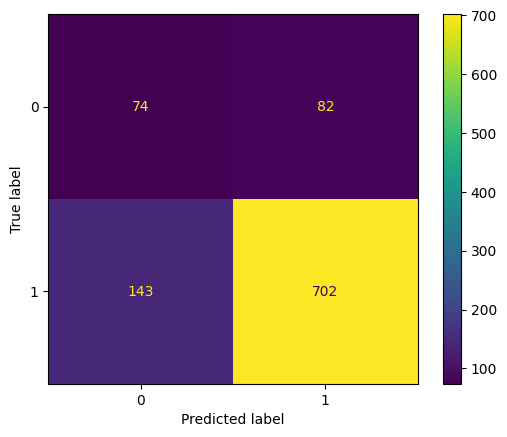

In [ ]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Construct the confusion matrix cm
cm = confusion_matrix(Y_test, nbY_pred, labels=gnb.classes_)

# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=gnb.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nbY_pred))

              precision    recall  f1-score   support

           0       0.34      0.47      0.40       156
           1       0.90      0.83      0.86       845

    accuracy                           0.78      1001
   macro avg       0.62      0.65      0.63      1001
weighted avg       0.81      0.78      0.79      1001



# **Use Logistic Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lrX = scaler.fit_transform(input_set)

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
lrX1_train,lrX1_test,lrY_train,lrY_test=train_test_split(lrX,output_set,test_size=0.25,random_state=10)
print('X1_train shape', lrX1_train.shape)
print('X1_test shape', lrX1_test.shape)

X1_train shape (3003, 13)
X1_test shape (1001, 13)


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(lrX1_train, lrY_train)
lrY_pred=logreg.predict(lrX1_test)

In [ ]:
lrY_pred

array([1, 1, 1, ..., 1, 1, 1])

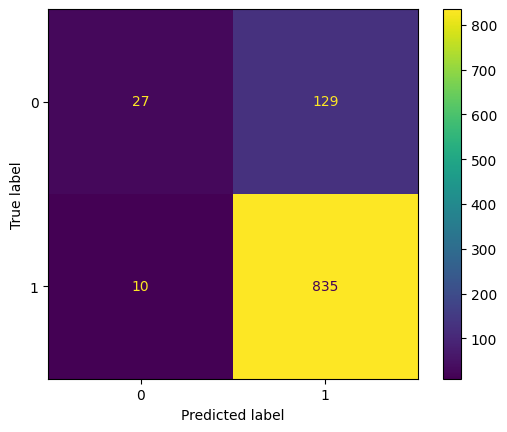

In [ ]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(lrY_test, lrY_pred, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

# **Use KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)

# For this it can use the same train and test data used in Naive Bayes
# Fit the classifier to the data
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Perform predictions on the test data
knnY_pred = knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':Y_test, 'Predicted': knnY_pred})
compare_results_knn_df

,Actual,Predicted
2177,0,1
2382,1,1
1715,1,1
2303,0,1
822,0,1
1055,1,1
2429,1,1
237,1,1
908,1,1
1243,0,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, knnY_pred))

              precision    recall  f1-score   support

           0       0.33      0.08      0.12       156
           1       0.85      0.97      0.91       845

    accuracy                           0.83      1001
   macro avg       0.59      0.52      0.52      1001
weighted avg       0.77      0.83      0.79      1001



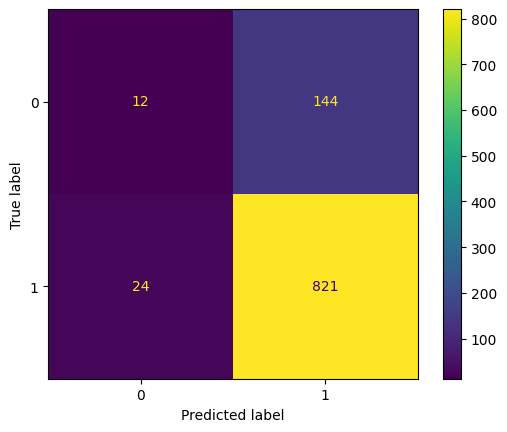

In [ ]:
#Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix

#Import the packages for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(Y_test, knnY_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()